In [331]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [332]:
closeData=pd.read_csv("tagWithCloseCount.csv")
openData=pd.read_csv("tagWithOpenCount.csv")

In [333]:
closeData.shape

(20666, 3)

In [334]:
openData.shape

(54126, 3)

In [335]:
tagData=closeData.merge(openData,how="outer")
print(tagData.head())
print(tagData.shape)

   TagId  countOfQuesClosed     TagName  countOfQuesStillOpen
0      1             4768.0        .net              263882.0
1      2            18998.0        html              747022.0
2      3            27528.0  javascript             1645699.0
3      4            12759.0         css              535258.0
4      5            29303.0         php             1160245.0
(54158, 4)


In [336]:
tagData[tagData['TagId']==26]

,TagId,countOfQuesClosed,TagName,countOfQuesStillOpen
20666,26,NaN,j#,57.0


In [337]:
tagData.replace(np.nan,0,inplace=True)

In [338]:
tagData[tagData['TagId']==26]

,TagId,countOfQuesClosed,TagName,countOfQuesStillOpen
20666,26,0.0,j#,57.0


In [351]:
tagData['closeCountNorm']=tagData['countOfQuesClosed']
#/np.sum(tagData['countOfQuesClosed'])
tagData['openCountNorm']=tagData['countOfQuesStillOpen']
#/np.sum(tagData['countOfQuesStillOpen'])
tagData['closeOpenRatio']=tagData['closeCountNorm']/(tagData['openCountNorm']+10)

In [352]:
tagData.head()

,TagId,countOfQuesClosed,TagName,countOfQuesStillOpen,closeCountNorm,openCountNorm,closeOpenRatio
850,1835,2119.0,open-source,1117.0,2119.0,1117.0,1.880213
245,508,749.0,agile,225.0,749.0,225.0,3.187234
685,1446,1134.0,licensing,569.0,1134.0,569.0,1.958549
710,1504,475.0,scrum,201.0,475.0,201.0,2.251185
1645,3871,274.0,gpl,0.0,274.0,0.0,27.400000


In [353]:
#MOST POPULAR TAGS

In [354]:
tagData.sort_values(by=['closeOpenRatio'],ascending=False,inplace=True)
print(tagData.head())

        TagId  countOfQuesClosed        TagName  countOfQuesStillOpen  \
1645     3871              274.0            gpl                   0.0   
1730     4089              102.0           lgpl                   0.0   
18358  111007               42.0  rosetta-stone                   0.0   
245       508              749.0          agile                 225.0   
232       474               30.0       freeware                   3.0   

       closeCountNorm  openCountNorm  closeOpenRatio  
1645            274.0            0.0       27.400000  
1730            102.0            0.0       10.200000  
18358            42.0            0.0        4.200000  
245             749.0          225.0        3.187234  
232              30.0            3.0        2.307692  


In [359]:
labels=tagData['TagName'].iloc[0:50]
#print(labels)
indices=[i for i in range(1,51)]
#print(indices)
ratios=np.array(tagData['closeOpenRatio'].iloc[0:50] )
# from sklearn.preprocessing import scale
# ratios=scale(ratios)
print(type(ratios))
print(ratios.shape)

<class 'numpy.ndarray'>
(50,)


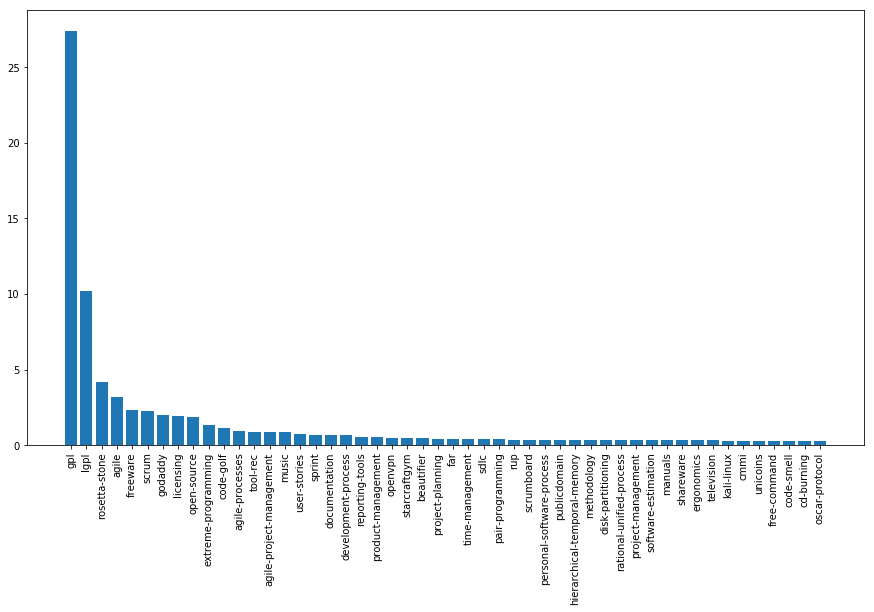

In [360]:
plt.figure(figsize=(15, 8))
plt.bar(indices,ratios,align='center')
plt.xticks(indices, labels)
plt.xticks(rotation=90)
plt.show()
#plt.savefig('D:\SAJAL\\foo.png')